# Importações

In [3]:
#import numpy as np
import pandas as pd
#import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import warnings
warnings.filterwarnings("ignore")

# Não Supervisionado

# Lendo dataset

In [4]:
# Carregar o conjunto de dados
data = pd.read_csv('../../Datasets/Mall_Customers.csv',index_col='CustomerID')
data

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [6]:
# Checagem de nulos
data.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [7]:
# Checagem de dados duplicados
data.duplicated().sum()

0

Aqui damos uma olhada no dataset para ver como os dados estão

In [8]:
data.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# KMeans

## Função que executa o kmeans em um dataset X calculando k medias

In [9]:
def calculateKMeans(dataset, n_clusters):
    """
    Calcula o modelo K-Means para um conjunto de dados.

    Parâmetros:
    dataset (array-like): Conjunto de dados a ser agrupado.
    n_clusters (int): Número de clusters a serem formados pelo algoritmo K-Means.

    Retorna:
    KMeans: O modelo K-Means treinado.
    """
    # Cria o modelo K-Means com o número especificado de clusters e uma semente de aleatoriedade fixa
    model = KMeans(n_clusters=n_clusters, random_state=15)
    
    # Ajusta o modelo aos dados fornecidos
    model.fit(dataset)
    
    # Retorna o modelo K-Means treinado
    return model

# Calculando quantidade de clusters

- Inicialmente a quantidade de clusters é limitada a raiz quadrada do número de amostras dividido por 2.
- Depois calculamos a quantidade de clusters ideal usando o método do cotovelo
- Depois calculamos a quantidade ideal de clusters usando o método da silhueta numérico e visual

In [10]:
limit = int((data.shape[0]//2)**0.5)
limit

10

## Cotovelo

Com o método do cotovelo avaliamos no gráfico onde a melhora nos níveis de variação começa a cair mais devagar.
Como o KMeans calcula a distância das observações até o centro do agrupamento que ela pertence, o ideal é que essa distância seja a menor viável. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (do inglês, within-clusters sum-of-squares (wcss)) seja a menor possível, sendo zero o resultado ótimo.

In [11]:
# Selecionar só 2 colunas para visualização
selected_columns = ['Annual_Income_(k$)', 'Spending_Score']
df = data[selected_columns]

wcss = []
for i in range(2, 11):
    kmeans = calculateKMeans(df,i)
    # método inércia, retorna o wcss do modelo
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44454.47647967974,
 37271.88623658949,
 33662.49190020505,
 25062.433792653785,
 22882.625101647514,
 21232.540729353143]

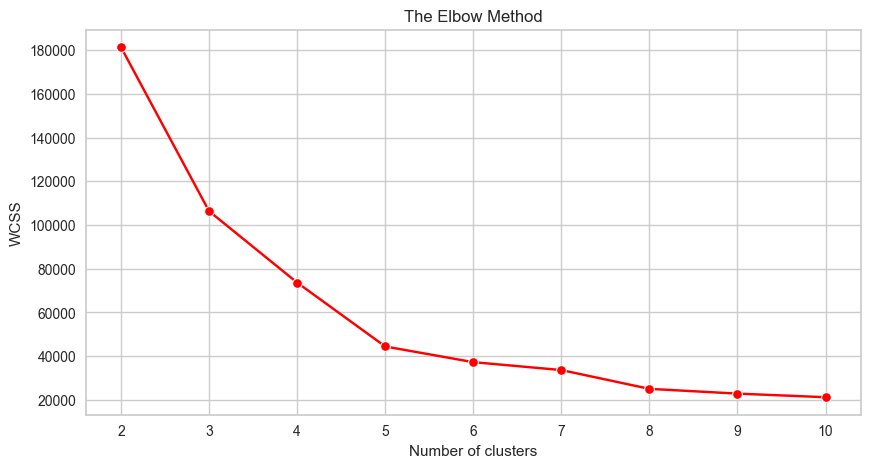

In [14]:
plt.figure(figsize=(10,5))
sns.lineplot(x=range(2, 11), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
model =  KMeans(init = 'k-means++', random_state=15)
visualizer = KElbowVisualizer(model, k=(2,limit))

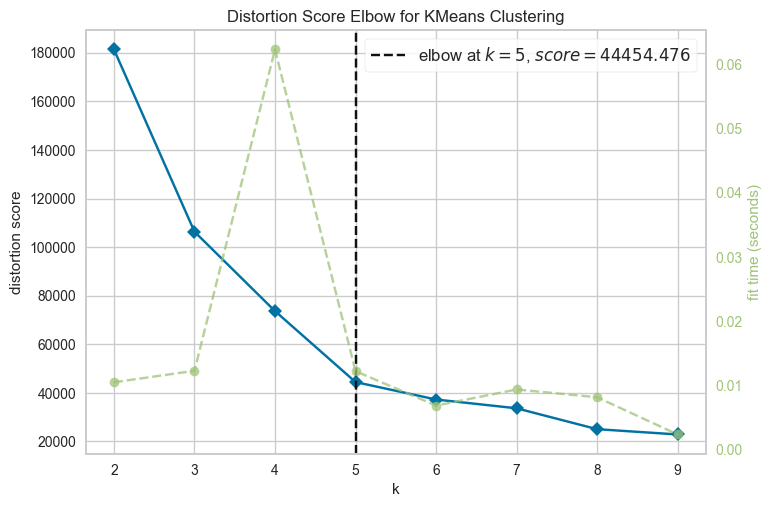

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer.fit(df)
visualizer.show()

## Silhueta

Método de silhueta observando a média dos valores de silhueta, quanto maior a média dos valores de silhueta, melhor a distribuição

In [17]:
for k in range(2, limit+1):
    """
    Itera sobre uma faixa de valores de k (número de clusters) para calcular e exibir o Silhouette Score para cada valor de k.
    """
    # Calcula o modelo K-Means para o número atual de clusters k
    model = calculateKMeans(df, k)
    
    # Faz previsões de cluster para o conjunto de dados
    pred = model.predict(df)
    
    # Calcula o Silhouette Score para as previsões de cluster
    score = silhouette_score(df, pred)
    
    # Exibe o Silhouette Score para o número atual de clusters k
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.297
Silhouette Score for k = 3: 0.468
Silhouette Score for k = 4: 0.493
Silhouette Score for k = 5: 0.553
Silhouette Score for k = 6: 0.538
Silhouette Score for k = 7: 0.502
Silhouette Score for k = 8: 0.453
Silhouette Score for k = 9: 0.449
Silhouette Score for k = 10: 0.430


Método de silhueta observando todos os valores graficamente

Para observar graficamente olhamos o tamanho de cada cluster, considerando se estão com quantidades uniformes ou não, se os clusters possuem scores acima da média(linha tracejada vermelha ou não) e como está a distribuição dos valores (valores mais positivos são melhores )

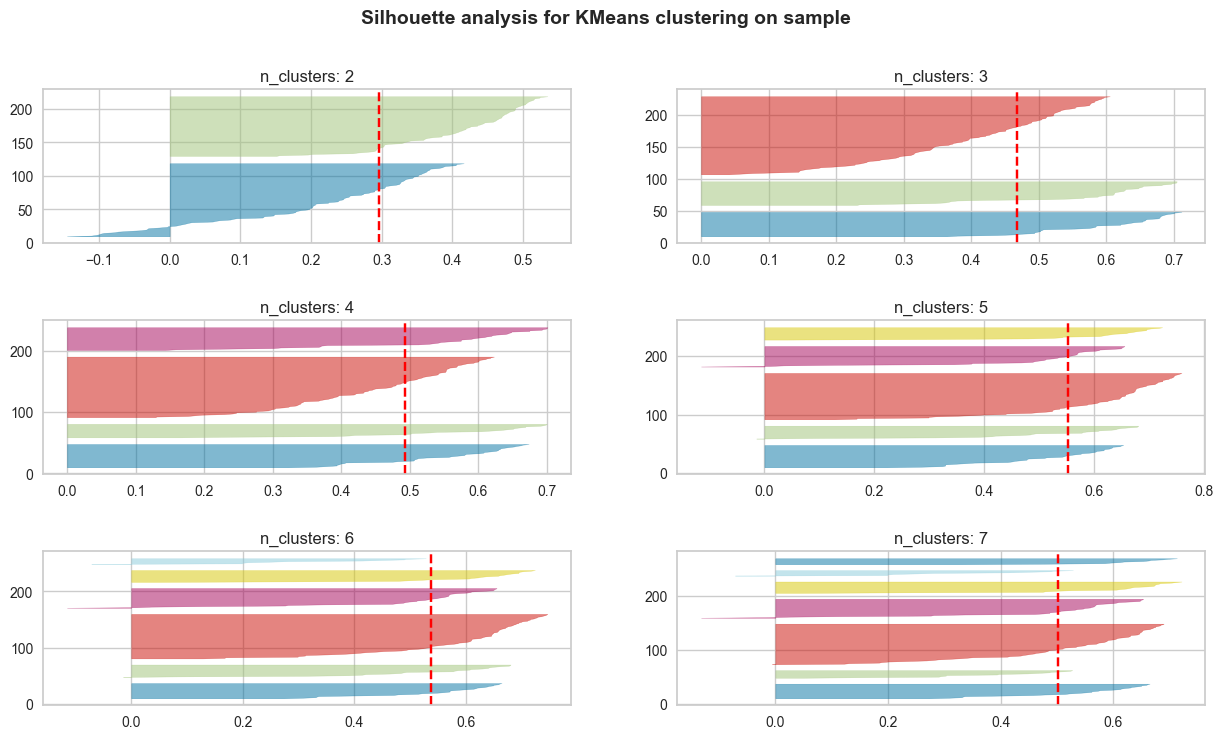

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
fig.subplots_adjust(hspace=0.5)
count = 2

# Define os títulos dos subplots com base no número de clusters
for axes in ax:
    for axe in axes:
        axe.set_title(f"n_clusters: {count}")
        count += 1

# Itera sobre diferentes números de clusters para análise de Silhouette
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Cria a instância KMeans para diferentes números de clusters
    '''
    km = calculateKMeans(df, i)
    q, mod = divmod(i, 2) # Divisão e resto para plotagem dos gráficos em subplots 3x2
    
    '''
    Cria a instância SilhouetteVisualizer com a instância KMeans e dá um fit no visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)
    
    # Define o título principal do gráfico
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample",
        fontsize=14,
        fontweight="bold",
    )

Com a silhueta e cotovelo podemos ver que o número de clusters ideal para esse problema é 5, visto que os clusters possuem tamanhos mais uniformes, valores acima da média e não possuem muitos valores negativos.

In [19]:
kmeans = calculateKMeans(df,5)

In [20]:
predictions = kmeans.predict(df)

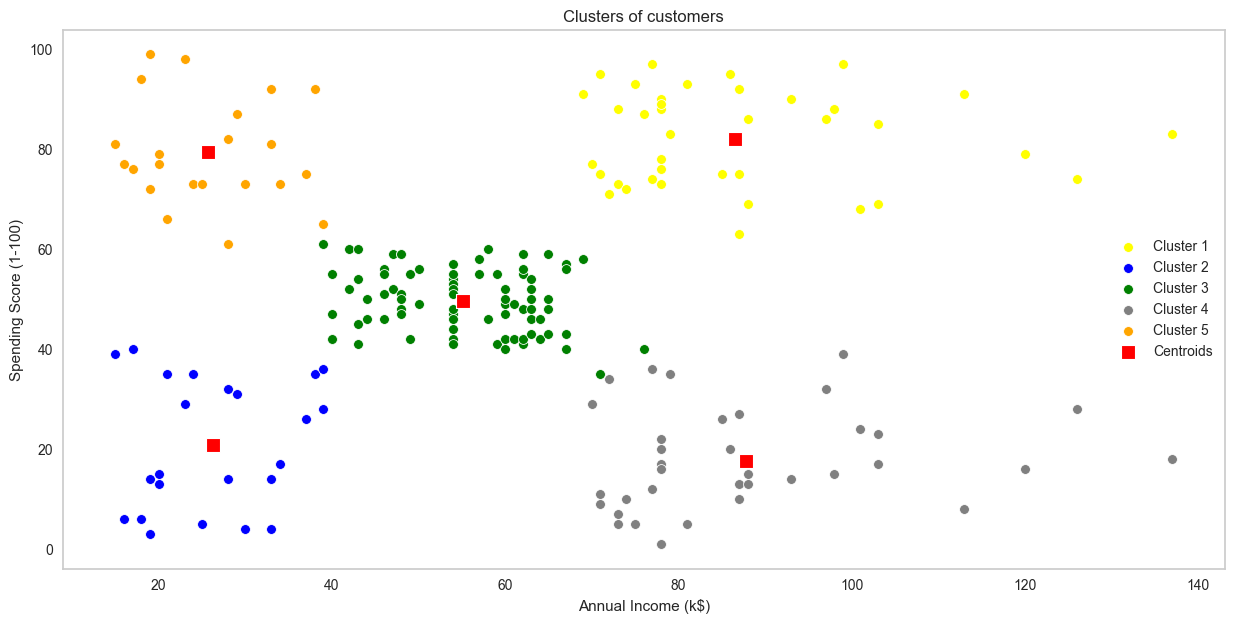

In [22]:
plt.figure(figsize=(15,7))

# Cluster 1
sns.scatterplot(x=df[predictions == 0]['Annual_Income_(k$)'].values, 
                y=df[predictions == 0]['Spending_Score'].values, 
                color='yellow', label='Cluster 1', s=50)

# Cluster 2
sns.scatterplot(x=df[predictions == 1]['Annual_Income_(k$)'].values, 
                y=df[predictions == 1]['Spending_Score'].values, 
                color='blue', label='Cluster 2', s=50)

# Cluster 3
sns.scatterplot(x=df[predictions == 2]['Annual_Income_(k$)'].values, 
                y=df[predictions == 2]['Spending_Score'].values, 
                color='green', label='Cluster 3', s=50)

# Cluster 4
sns.scatterplot(x=df[predictions == 3]['Annual_Income_(k$)'].values, 
                y=df[predictions == 3]['Spending_Score'].values, 
                color='grey', label='Cluster 4', s=50)

# Cluster 5
sns.scatterplot(x=df[predictions == 4]['Annual_Income_(k$)'].values, 
                y=df[predictions == 4]['Spending_Score'].values, 
                color='orange', label='Cluster 5', s=50)

# Centróides
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], 
                y=kmeans.cluster_centers_[:, 1], 
                color='red', label='Centroids', s=100, marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


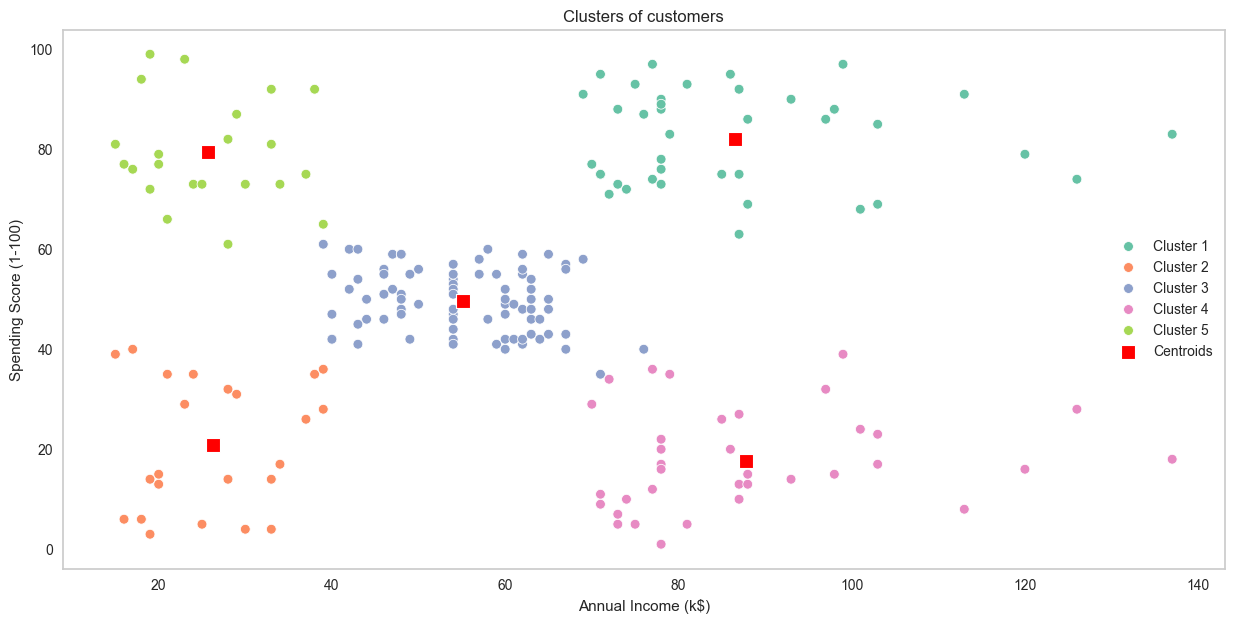

In [25]:
# Visualização dos grupos

# Define o tamanho da figura do gráfico
plt.figure(figsize=(15,7))

# Adiciona a coluna 'predictions' ao DataFrame com as previsões dos clusters
df['predictions'] = predictions

# Cria uma nova coluna 'label_predictions' com rótulos de clusters categorizados
df['label_predictions'] = pd.cut(df['predictions'], bins=5, labels=[f'Cluster {i}' for i in range(1, 6)])

# Plota os pontos dos clientes com cores diferentes para cada cluster
sns.scatterplot(x=df['Annual_Income_(k$)'].values, y=df['Spending_Score'].values, hue=df['label_predictions'].values, palette='Set2', s=50)

# Plota os centróides dos clusters
sns.scatterplot(x=kmeans.cluster_centers_[:, 0],y=kmeans.cluster_centers_[:, 1], color='red', label='Centroids', s=100, marker=',')

# Desativa a grade do gráfico
plt.grid(False)

# Define o título do gráfico
plt.title('Clusters of customers')

# Define o rótulo do eixo X
plt.xlabel('Annual Income (k$)')

# Define o rótulo do eixo Y
plt.ylabel('Spending Score (1-100)')

# Adiciona a legenda ao gráfico
plt.legend()

# Exibe o gráfico
plt.show()